<div style='color:white;margin:0;font-size:50px;font-family:Montserrat;text-align:center;display:fill;border-radius:5px;overflow:hidden;font-weight:500;background-color:#a62534;padding:20px;'>Predictive Modeling of Median House Values in California Using 1990 U.S. Census Data</div>

<div style='width: 200px; height: 100px; background-color:#a62534; border-radius: 5px; display: flex; justify-content: center; align-items: center; margin: 50px auto;'>
        <h5 style='text-align: center; font-family: Montserrat; font-size: 20px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; letter-spacing: 1px; color: white; margin: 0;'>
            conducted by Mitul Galav
        </h5>
    </div>

<br>    
<p style='text-align: center;'>
<img src='https://upload.wikimedia.org/wikipedia/commons/6/65/Flag_of_California.png' style='width: 800px; height: 500px;'>
</p>

# <div style='padding:20px;color:white;margin:0;font-size:30px;font-family:Montserrat;text-align:left;display:fill;border-radius:5px;background-color:#a62534;overflow:hidden'>Problem Statement</div>

#### `Background`

The dataset in question is derived from the 1990 U.S. Census, focusing on block groups, which are the smallest geographical units for which sample data is published. Each block group typically has a population ranging from 600 to 3,000 people. The dataset includes various demographic and housing attributes per block group, which are used to capture the socio-economic and housing characteristics of each area.

#### `Objective`

The objective is to build a predictive model that accurately estimates the median house value (`median_house_value`) of block groups in California. The target variable, `median_house_value`, is expressed in hundreds of thousands of dollars ($100,000). By leveraging the independent variables provided in the dataset, we aim to understand the factors that significantly influence house values and develop a model that can predict these values for new or unseen data.

#### `Independent Variables`

| Variable              | Description                                                   |
|-----------------------|---------------------------------------------------------------|
| longitude             | Longitude coordinate of the block group                       |
| latitude              | Latitude coordinate of the block group                        |
| housing_median_age    | Median house age in the block group                           |
| total_rooms           | Total number of rooms in the block group                      |
| total_bedrooms        | Total number of bedrooms in the block group                   |
| population            | Total population of the block group                           |
| households            | Total number of households in the block group                 |
| median_income         | Median income in the block group                              |
| ocean_proximity       | Proximity to the ocean (categorical variable)                 |

#### `Methodology`

The task is to develop a predictive model to estimate the median house value (`median_house_value`) in California block groups based on the provided demographic and housing characteristics. The model should be capable of capturing the underlying relationships between the independent variables and the target variable, allowing for accurate predictions. This involves:

1. **Data Exploration and Preprocessing**: Understanding the distribution and relationships of the variables, handling missing values, and performing any necessary data transformations.
2. **Model Selection and Training**: Choosing appropriate machine learning algorithms and training models using the independent variables to predict the target variable.
3. **Model Evaluation**: Assessing the performance of the models using appropriate metrics and validating the results to ensure robustness.
4. **Prediction and Interpretation**: Using the trained model to make predictions on new data and interpreting the results to provide insights into the factors influencing house values in California.

#### `Expected Outcome`

A reliable predictive model that can accurately estimate median house values in California block groups, providing valuable insights for real estate professionals, urban planners, and policy makers. This model can be used to identify trends, make informed decisions, and potentially guide future developments in the housing market.

# <div style='padding:20px;color:white;margin:0;font-size:30px;font-family:Montserrat;text-align:left;display:fill;border-radius:5px;background-color:#a62534;overflow:hidden'>Python Libraries</div>

In [156]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as ss
import warnings as wn
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score


# Ignore all warnings
wn.filterwarnings('ignore')

# Set sns fig facecolor
sns.set_style('ticks', rc={'axes.facecolor':'honeydew'})

# <div style='padding:20px;color:white;margin:0;font-size:30px;font-family:Montserrat;text-align:left;display:fill;border-radius:5px;background-color:#a62534;overflow:hidden'>Load Data</div>

In [30]:
cali_v1 = pd.read_csv('/Users/mitch/work_env/Portfolio/ML/LR/california-housing/housing.csv')

In [31]:
cali_v1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# <div style='padding:20px;color:white;margin:0;font-size:30px;font-family:Montserrat;text-align:left;display:fill;border-radius:5px;background-color:#a62534;overflow:hidden'>Data Exploration</div>

In [32]:
# Get shape of data
print(f'Data Instances  : {cali_v1.shape[0]}')
print(f'Data Attributes : {cali_v1.shape[1]}')

Data Instances  : 20640
Data Attributes : 10


In [33]:
# Data types of attributes
print(cali_v1.dtypes)

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object


##### ***Data contains `9 Numeric attributes` and `1 Categorical attribute`***

In [34]:
cali_v1.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


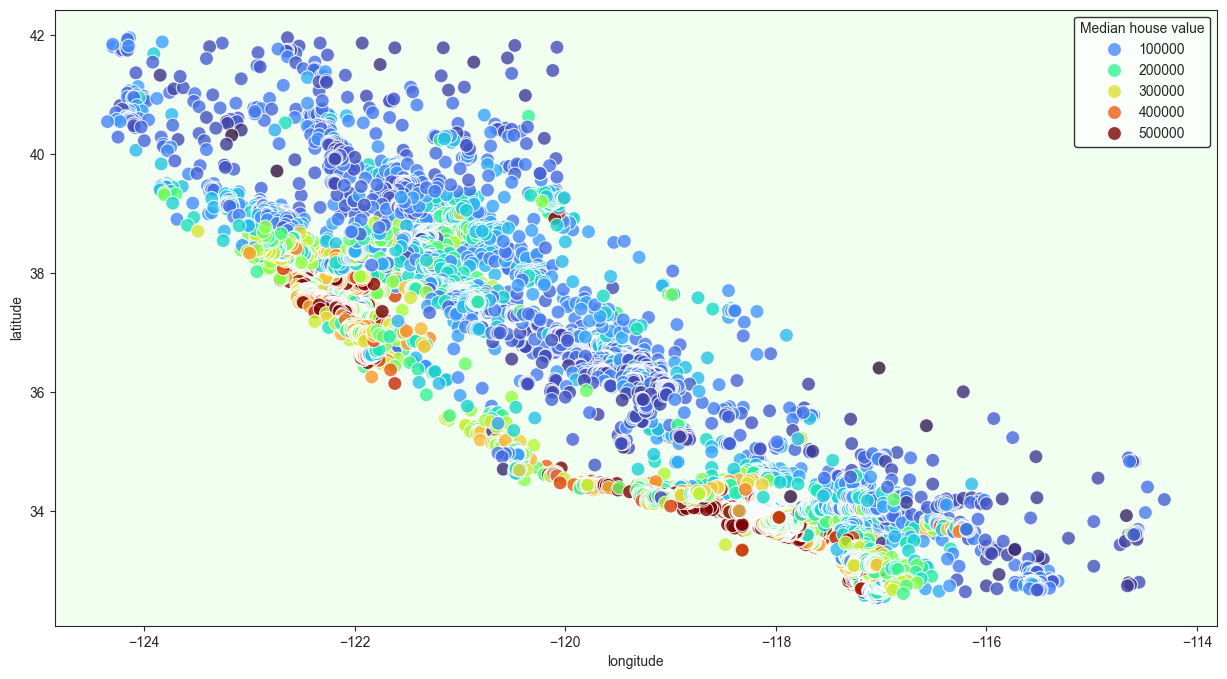

In [221]:
plt.figure(figsize=(15, 8))
sns.scatterplot(data=cali_v1, x="longitude", y="latitude", hue='median_house_value', palette='turbo', s=100, alpha=0.8)
plt.legend(facecolor='white', edgecolor='black', title='Median house value')
plt.show()

> <span style='font-size:28px; font-family:Verdana;color:red;'><b>Encoding Categorical Value</b></span>

In [35]:
cali_v1['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [36]:
# Encode the values
encoder = LabelEncoder()

# Encode the ocean_proximity column
cali_v1['ocean_proximity_encoded'] = encoder.fit_transform(cali_v1['ocean_proximity'])

# Drop the original ocean_proximity column
cali_v1.drop('ocean_proximity', axis=1, inplace=True)

In [37]:
cali_v1['ocean_proximity_encoded'].value_counts()

ocean_proximity_encoded
0    9136
1    6551
4    2658
3    2290
2       5
Name: count, dtype: int64

In [38]:
cali_v1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_encoded
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


> <span style='font-size:28px; font-family:Verdana;color:red;'><b>Dealing with Null values</b></span>

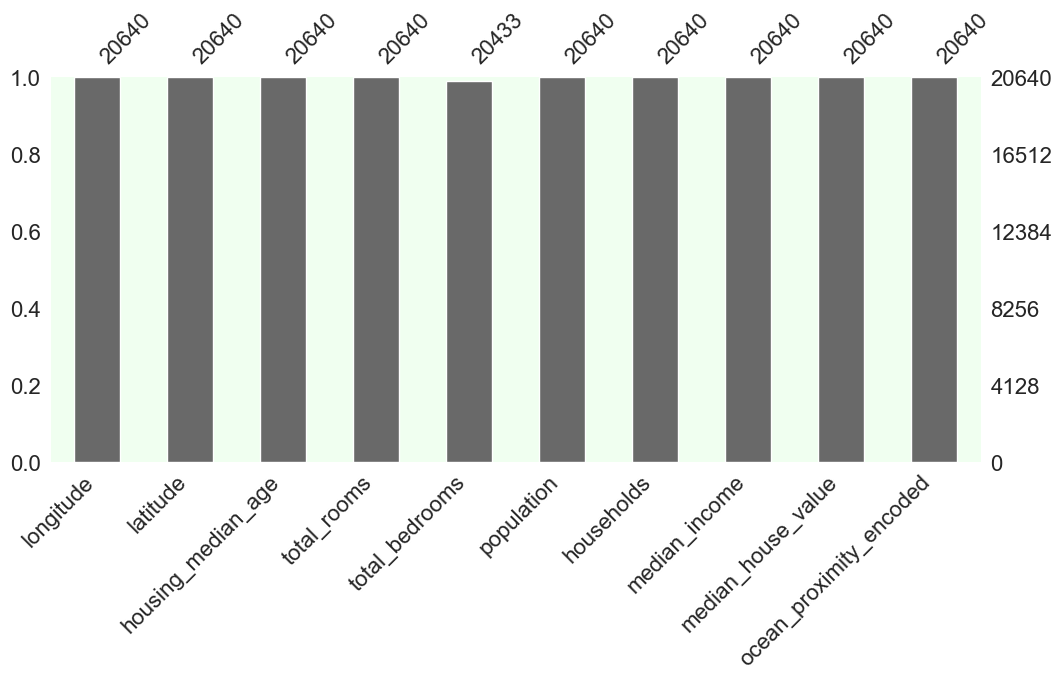

In [45]:
msno.bar(cali_v1, figsize=(12,5))
plt.show()

In [46]:
cali_v1.isna().sum()

longitude                    0
latitude                     0
housing_median_age           0
total_rooms                  0
total_bedrooms             207
population                   0
households                   0
median_income                0
median_house_value           0
ocean_proximity_encoded      0
dtype: int64

#### ***total_bedrooms has 207 null values***

In [47]:
# Initiate an imputer
imputer = SimpleImputer(strategy='median')

# Fit and transform the data
cali_v2 = pd.DataFrame(imputer.fit_transform(cali_v1), columns=cali_v1.columns)

In [48]:
cali_v2.isna().sum()

longitude                  0
latitude                   0
housing_median_age         0
total_rooms                0
total_bedrooms             0
population                 0
households                 0
median_income              0
median_house_value         0
ocean_proximity_encoded    0
dtype: int64

#### ***longitude and latitude attributes are not needed for modelling, so i will create a new dataframe called `cali_v3` without them, the geographic values will be stored in cali_v2 for visualisation purposes***

In [58]:
cali_v3 = cali_v2.iloc[:, 2:]

# <div style='padding:20px;color:white;margin:0;font-size:30px;font-family:Montserrat;text-align:left;display:fill;border-radius:5px;background-color:#a62534;overflow:hidden'>Attribute Exploration</div>

In [59]:
cali_v3.columns

Index(['housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
       'households', 'median_income', 'median_house_value',
       'ocean_proximity_encoded'],
      dtype='object')

> <span style='font-size:28px; font-family:Verdana;color:red;'><b>Total Rooms</b></span>

In [60]:
cali_v3['total_rooms'].describe()

count    20640.000000
mean      2635.763081
std       2181.615252
min          2.000000
25%       1447.750000
50%       2127.000000
75%       3148.000000
max      39320.000000
Name: total_rooms, dtype: float64

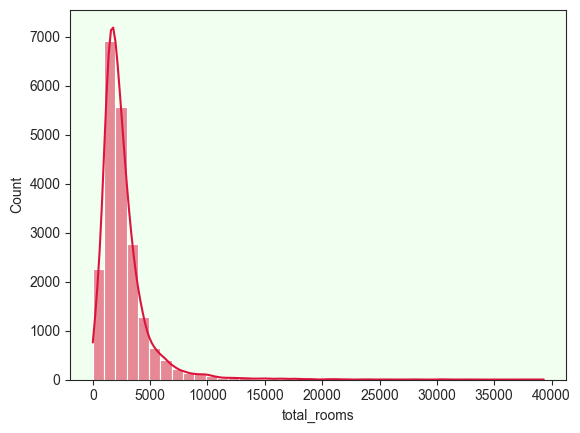

In [70]:
sns.histplot(cali_v3['total_rooms'], bins=40, kde=True, color='crimson')
plt.show()

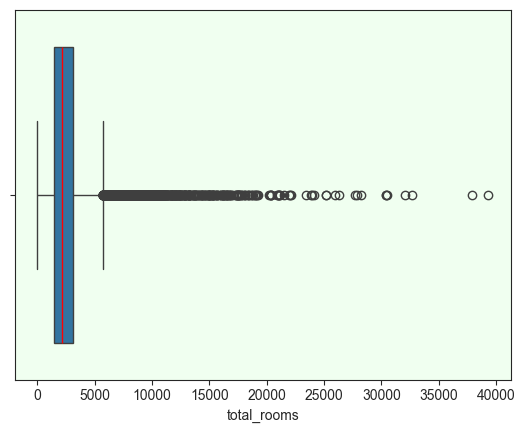

In [81]:
sns.boxplot(data=cali_v3, x='total_rooms', orient='h', medianprops={'color': 'r', 'linewidth': 1})
plt.show()

In [86]:
# Deal with outliers
q1 = np.percentile(cali_v3['total_rooms'], 25)
q3 = np.percentile(cali_v3['total_rooms'], 75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Remove outliers
cali_v4 = cali_v3[(cali_v3['total_rooms'] >= lower_bound) & (cali_v3['total_rooms'] <= upper_bound)]

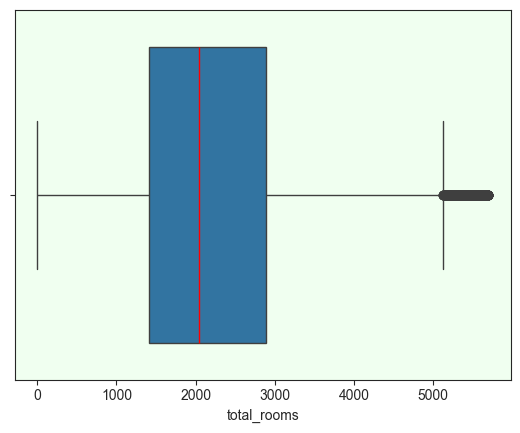

In [85]:
sns.boxplot(data=cali_v4, x='total_rooms', orient='h', medianprops={'color': 'r', 'linewidth': 1})
plt.show()

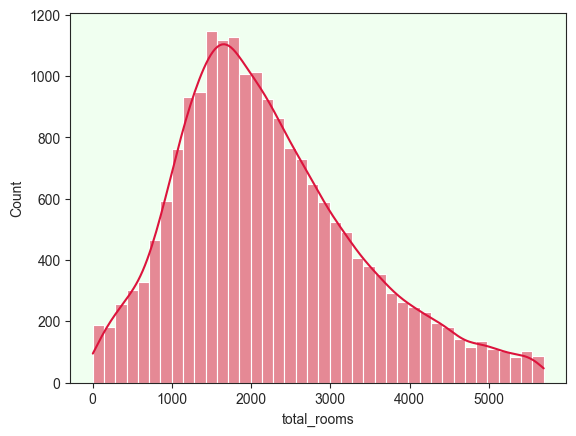

In [88]:
sns.histplot(cali_v4['total_rooms'], bins=40, kde=True, color='crimson')
plt.show()

> <span style='font-size:28px; font-family:Verdana;color:red;'><b>Total Bedrooms</b></span>

In [89]:
cali_v4['total_bedrooms'].describe()

count    19353.000000
mean       463.237793
std        253.118330
min          1.000000
25%        289.000000
50%        419.000000
75%        592.000000
max       2610.000000
Name: total_bedrooms, dtype: float64

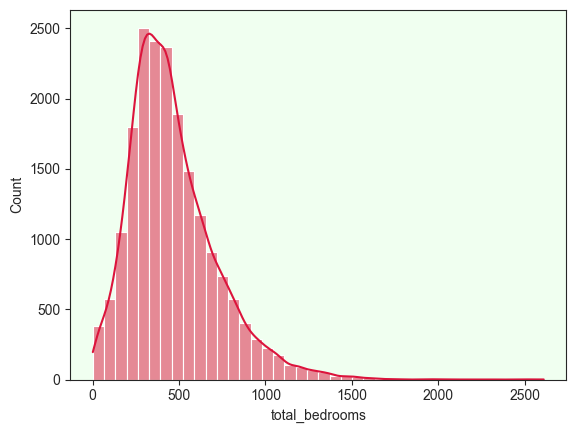

In [91]:
sns.histplot(cali_v4['total_bedrooms'], kde=True, color='crimson', bins=40)
plt.show()

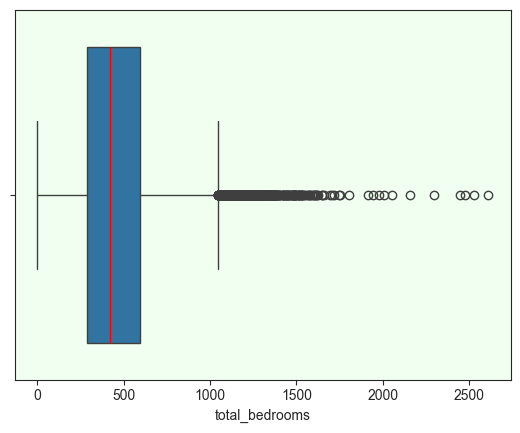

In [92]:
sns.boxplot(data=cali_v4, x='total_bedrooms', orient='h', medianprops={'color':'r', 'linewidth': 1})
plt.show()

In [93]:
# Deal with outliers
q1 = np.percentile(cali_v4['total_bedrooms'], 25)
q3 = np.percentile(cali_v4['total_bedrooms'], 75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Remove outliers
cali_v4 = cali_v4[(cali_v4['total_bedrooms'] >= lower_bound) & (cali_v4['total_bedrooms'] <= upper_bound)]

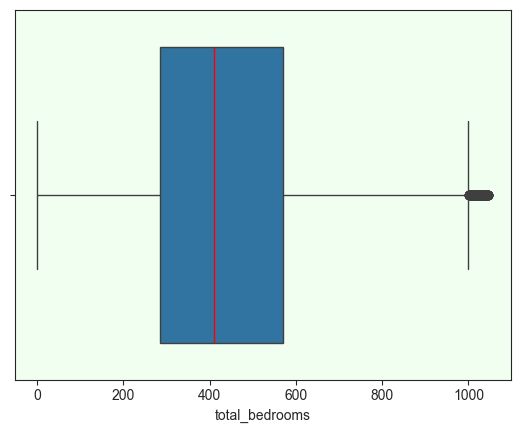

In [94]:
sns.boxplot(data=cali_v4, x='total_bedrooms', orient='h', medianprops={'color':'r', 'linewidth': 1})
plt.show()

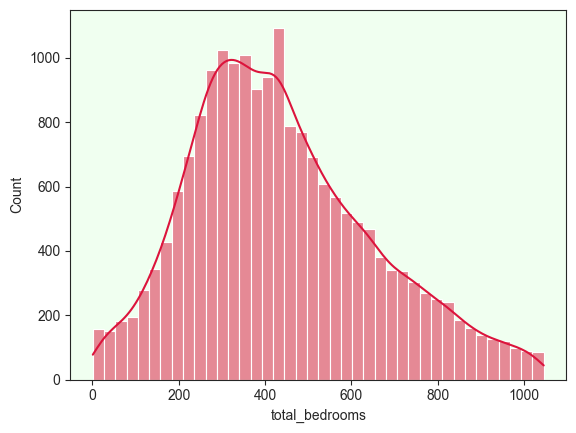

In [95]:
sns.histplot(cali_v4['total_bedrooms'], kde=True, color='crimson', bins=40)
plt.show()

> <span style='font-size:28px; font-family:Verdana;color:red;'><b>Population</b></span>

In [97]:
cali_v4['population'].describe()

count    18778.000000
mean      1198.037118
std        647.266347
min          3.000000
25%        754.000000
50%       1095.000000
75%       1541.000000
max       8733.000000
Name: population, dtype: float64

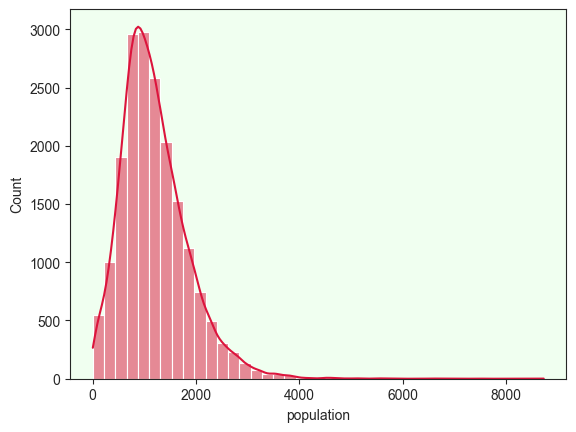

In [98]:
sns.histplot(cali_v4['population'], kde=True, color='crimson', bins=40)
plt.show()

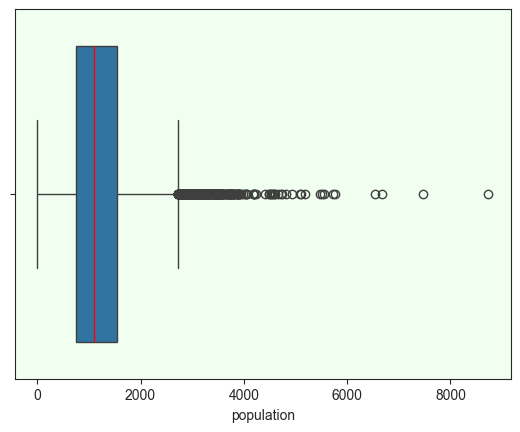

In [99]:
sns.boxplot(data=cali_v4, x='population', orient='h', medianprops={'color':'r', 'linewidth': 1})
plt.show()

In [100]:
# Deal with outliers
q1 = np.percentile(cali_v4['population'], 25)
q3 = np.percentile(cali_v4['population'], 75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Remove outliers
cali_v4 = cali_v4[(cali_v4['population'] >= lower_bound) & (cali_v4['population'] <= upper_bound)]

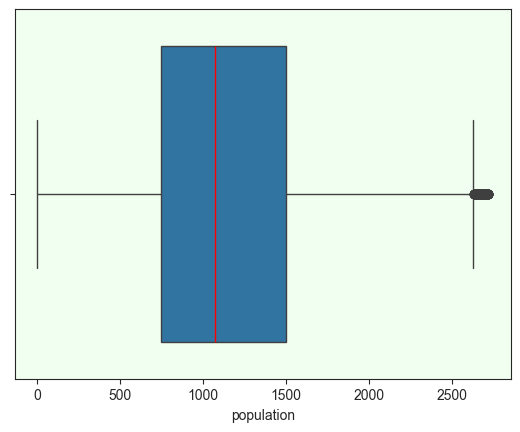

In [101]:
sns.boxplot(data=cali_v4, x='population', orient='h', medianprops={'color':'r', 'linewidth': 1})
plt.show()

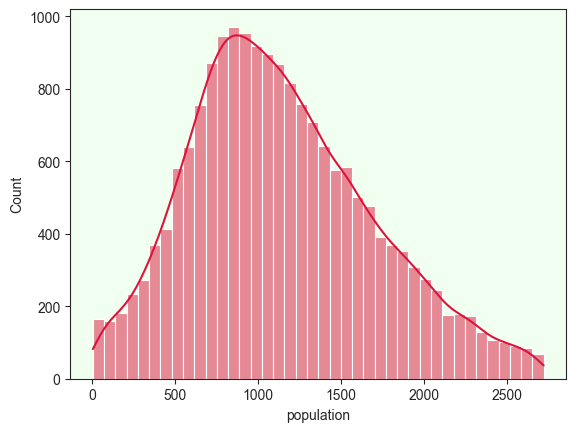

In [102]:
sns.histplot(cali_v4['population'], kde=True, color='crimson', bins=40)
plt.show()

> <span style='font-size:28px; font-family:Verdana;color:red;'><b>Housing Median Age</b></span>

In [103]:
cali_v4['housing_median_age'].describe()

count    18296.000000
mean        29.830127
std         12.330663
min          1.000000
25%         20.000000
50%         31.000000
75%         38.000000
max         52.000000
Name: housing_median_age, dtype: float64

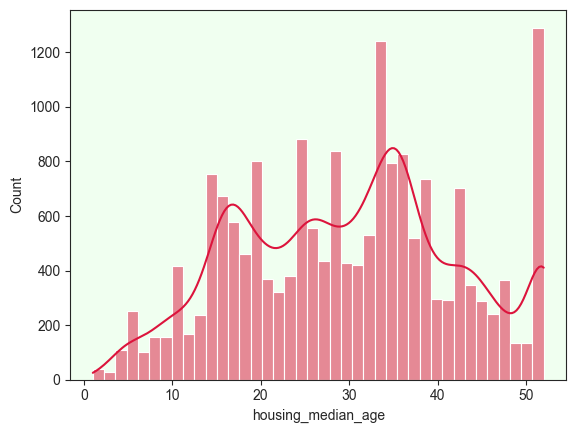

In [104]:
sns.histplot(cali_v4['housing_median_age'], kde=True, color='crimson', bins=40)
plt.show()

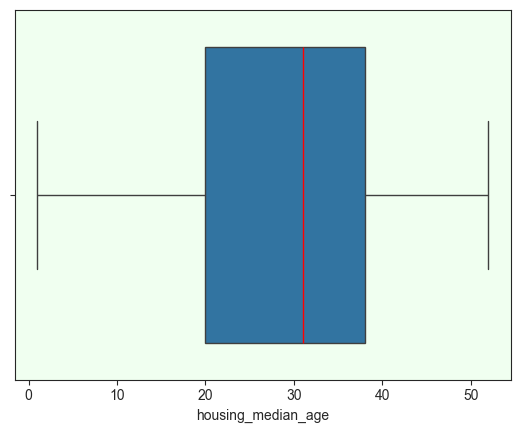

In [106]:
sns.boxplot(data=cali_v4, x='housing_median_age', orient='h', medianprops={'color':'r', 'linewidth': 1})
plt.show()

> <span style='font-size:28px; font-family:Verdana;color:red;'><b>Households</b></span>

In [108]:
cali_v4['households'].describe()

count    18296.000000
mean       402.731854
std        192.803077
min          1.000000
25%        266.000000
50%        379.000000
75%        523.000000
max       1093.000000
Name: households, dtype: float64

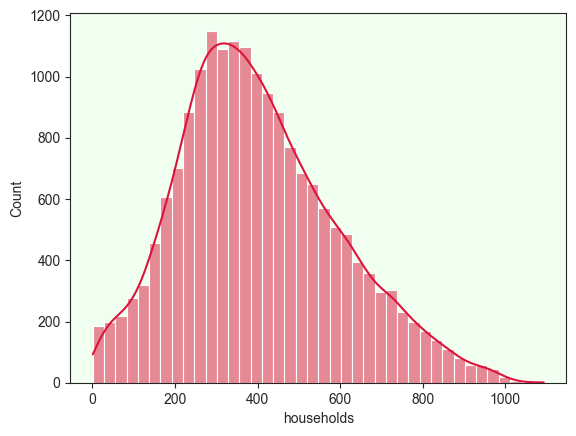

In [109]:
sns.histplot(cali_v4['households'], kde=True, color='crimson', bins=40)
plt.show()

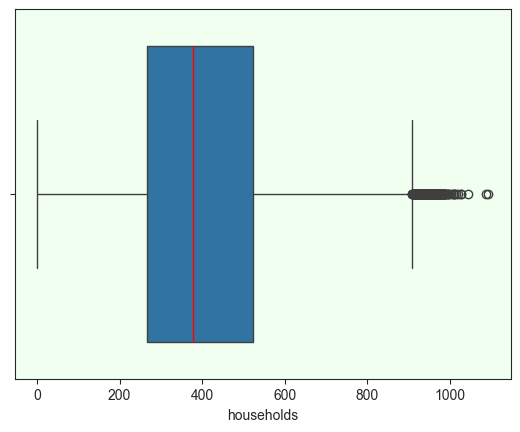

In [110]:
sns.boxplot(data=cali_v4, x='households', orient='h', medianprops={'color':'r', 'linewidth': 1})
plt.show()

In [111]:
# Deal with outliers
q1 = np.percentile(cali_v4['households'], 25)
q3 = np.percentile(cali_v4['households'], 75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Remove outliers
cali_v4 = cali_v4[(cali_v4['households'] >= lower_bound) & (cali_v4['households'] <= upper_bound)]

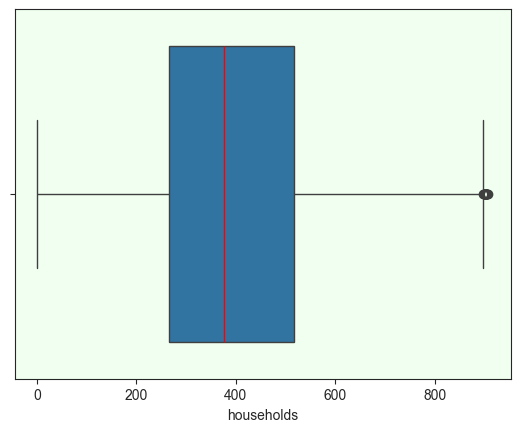

In [113]:
sns.boxplot(data=cali_v4, x='households', orient='h', medianprops={'color':'r', 'linewidth': 1})
plt.show()

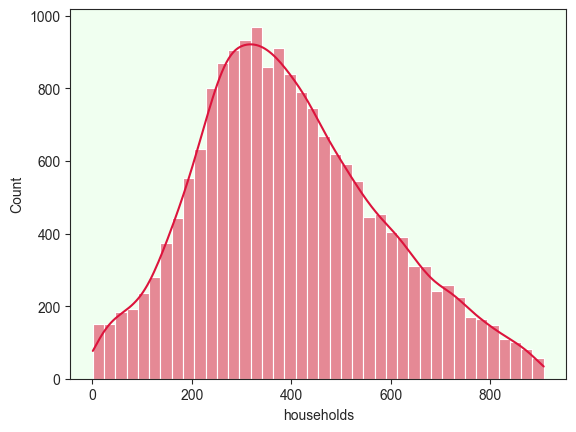

In [114]:
sns.histplot(cali_v4['households'], kde=True, color='crimson', bins=40)
plt.show()

> <span style='font-size:28px; font-family:Verdana;color:red;'><b>Median Income</b></span>

In [115]:
cali_v4['median_income'].describe()

count    18126.000000
mean         3.859723
std          1.914661
min          0.499900
25%          2.544450
50%          3.526800
75%          4.736100
max         15.000100
Name: median_income, dtype: float64

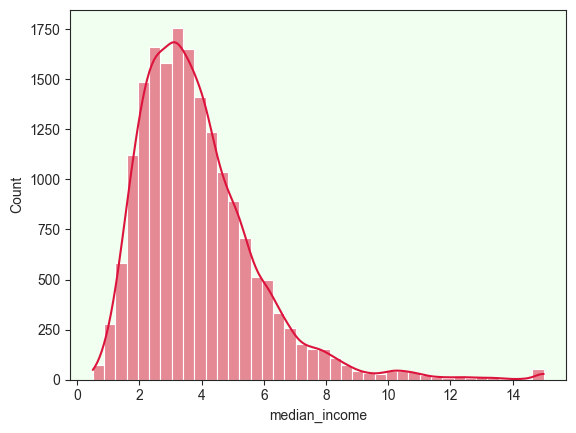

In [116]:
sns.histplot(cali_v4['median_income'], kde=True, color='crimson', bins=40)
plt.show()

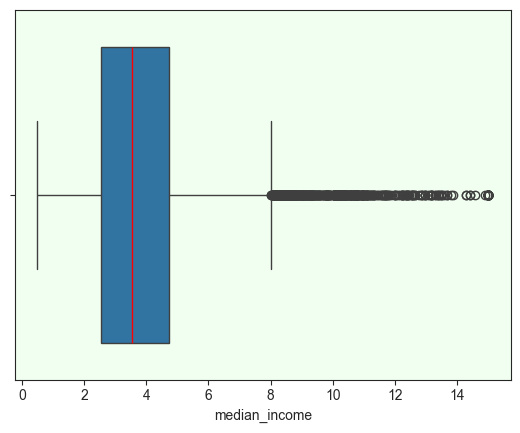

In [117]:
sns.boxplot(data=cali_v4, x='median_income', orient='h', medianprops={'color':'r', 'linewidth': 1})
plt.show()

In [118]:
# Deal with outliers
q1 = np.percentile(cali_v4['median_income'], 25)
q3 = np.percentile(cali_v4['median_income'], 75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Remove outliers
cali_v4 = cali_v4[(cali_v4['median_income'] >= lower_bound) & (cali_v4['median_income'] <= upper_bound)]

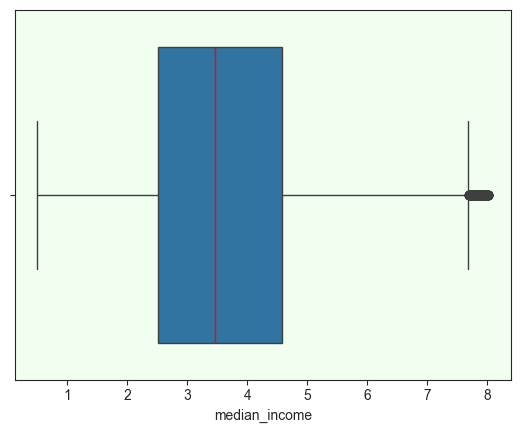

In [119]:
sns.boxplot(data=cali_v4, x='median_income', orient='h', medianprops={'color':'r', 'linewidth': 1})
plt.show()

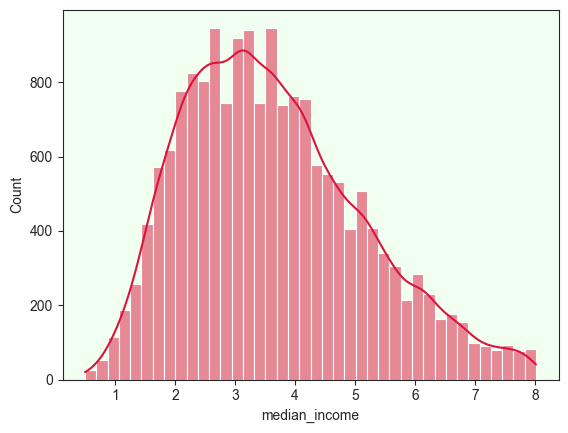

In [120]:
sns.histplot(cali_v4['median_income'], kde=True, color='crimson', bins=40)
plt.show()

> <span style='font-size:28px; font-family:Verdana;color:red;'><b>Ocean Proximity</b></span>

In [121]:
cali_v4['ocean_proximity_encoded'].describe()

count    17532.000000
mean         1.178930
std          1.417793
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          4.000000
Name: ocean_proximity_encoded, dtype: float64

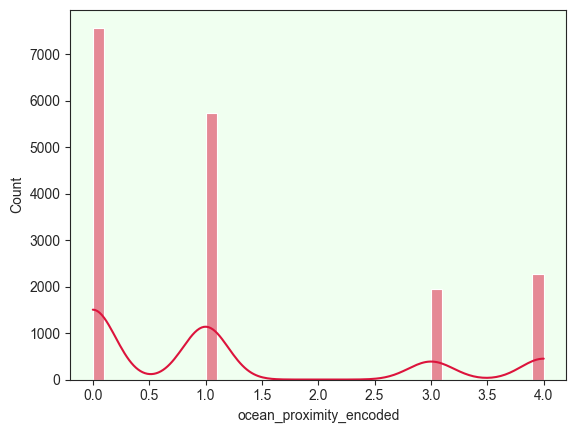

In [122]:
sns.histplot(cali_v4['ocean_proximity_encoded'], kde=True, color='crimson', bins=40)
plt.show()

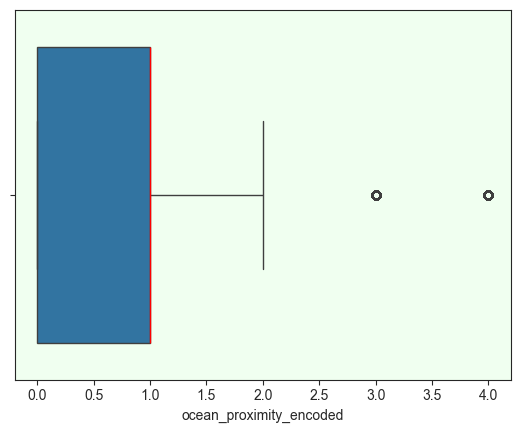

In [123]:
sns.boxplot(data=cali_v4, x='ocean_proximity_encoded', orient='h', medianprops={'color':'r', 'linewidth': 1})
plt.show()

#### ***These values are encoded, so no need to remove outliers***

> <span style='font-size:28px; font-family:Verdana;color:red;'><b>Median House Value (Target Variable)</b></span>

In [124]:
cali_v4['median_house_value'].describe()

count     17532.000000
mean     196574.940794
std      107345.354381
min       14999.000000
25%      113900.000000
50%      173800.000000
75%      251725.000000
max      500001.000000
Name: median_house_value, dtype: float64

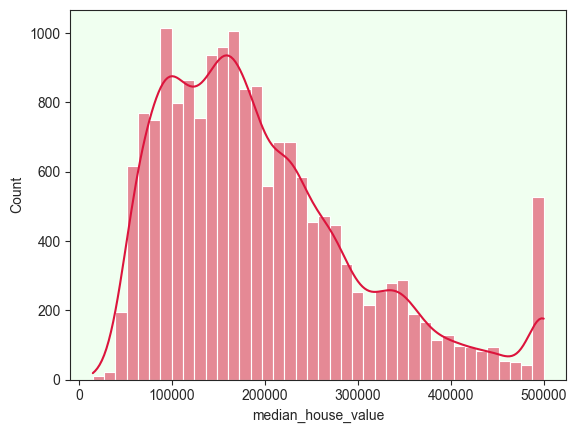

In [125]:
sns.histplot(cali_v4['median_house_value'], kde=True, color='crimson', bins=40)
plt.show()

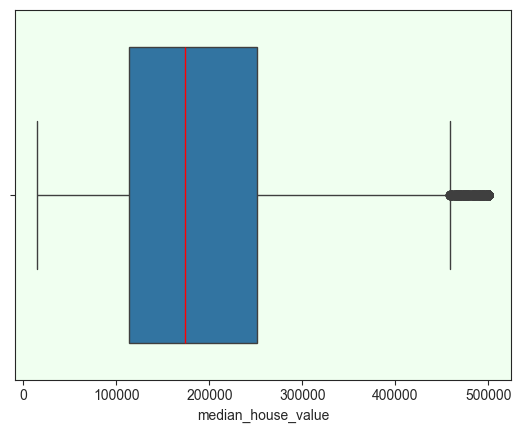

In [126]:
sns.boxplot(data=cali_v4, x='median_house_value', orient='h', medianprops={'color':'r', 'linewidth': 1})
plt.show()

In [130]:
# Deal with outliers
q1 = np.percentile(cali_v4['median_house_value'], 25)
q3 = np.percentile(cali_v4['median_house_value'], 75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Remove outliers
cali_v4 = cali_v4[(cali_v4['median_house_value'] >= lower_bound) & (cali_v4['median_house_value'] <= upper_bound)]

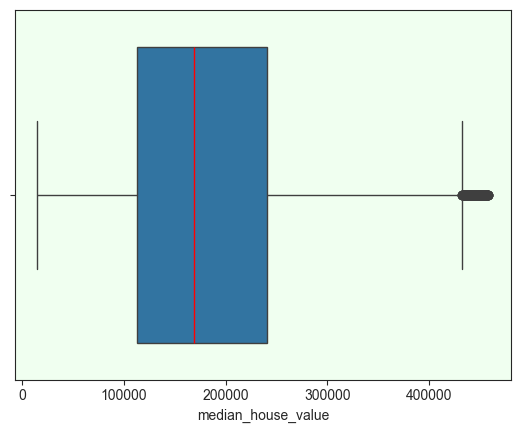

In [131]:
sns.boxplot(data=cali_v4, x='median_house_value', orient='h', medianprops={'color':'r', 'linewidth': 1})
plt.show()

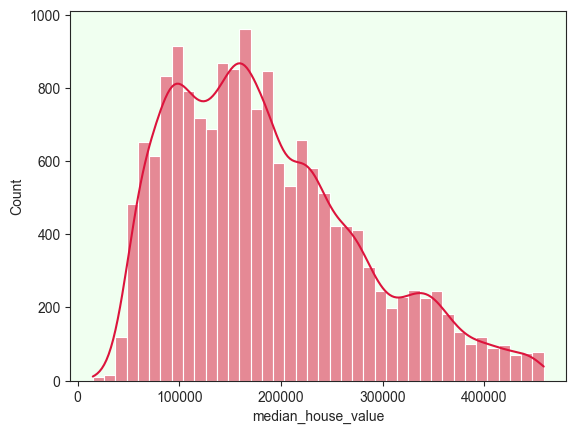

In [132]:
sns.histplot(cali_v4['median_house_value'], kde=True, color='crimson', bins=40)
plt.show()

# <div style='padding:20px;color:white;margin:0;font-size:30px;font-family:Montserrat;text-align:left;display:fill;border-radius:5px;background-color:#a62534;overflow:hidden'>Identifying Relationships</div>

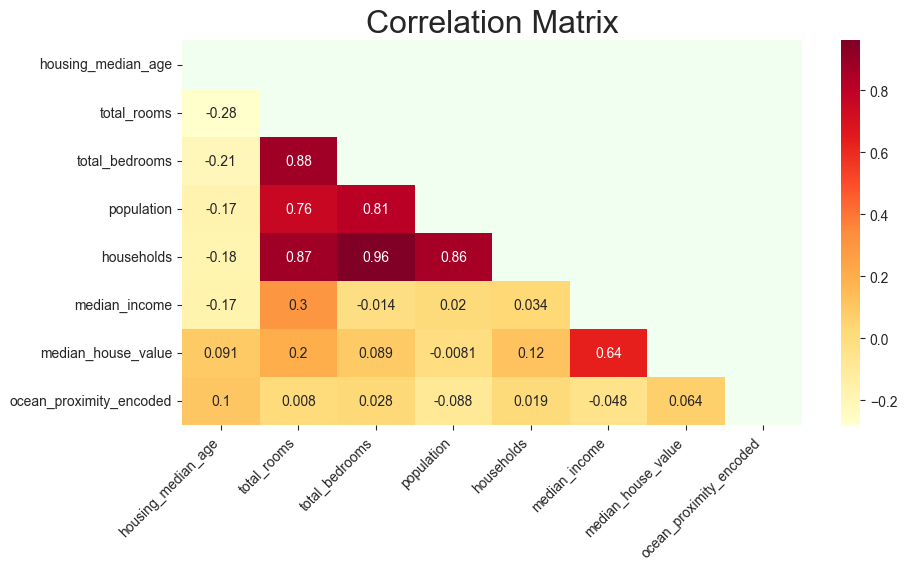

In [133]:
plt.figure(figsize=(10,5))
sns.heatmap(cali_v4.corr(), annot=True, cmap='YlOrRd', mask=np.triu(cali_v4.corr()))
plt.title('Correlation Matrix', fontsize=23)
plt.xticks(rotation=45, ha='right')
plt.show()

#### ***`Median_house_value and Median_income`***

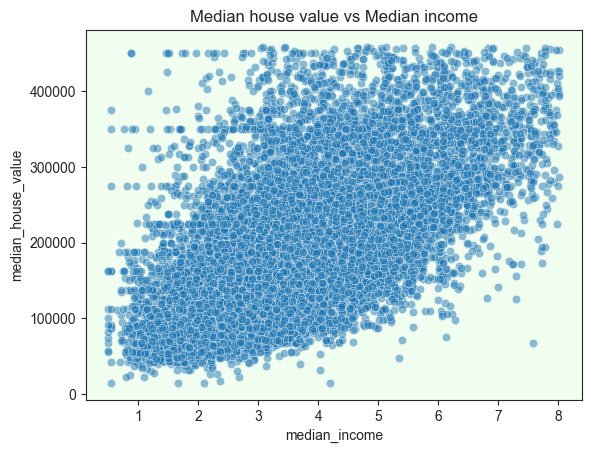

In [135]:
sns.scatterplot(data=cali_v4, x='median_income', y='median_house_value', alpha=0.5)
plt.title('Median house value vs Median income')
plt.show()

#### ***`Median_house_value and Total rooms`***

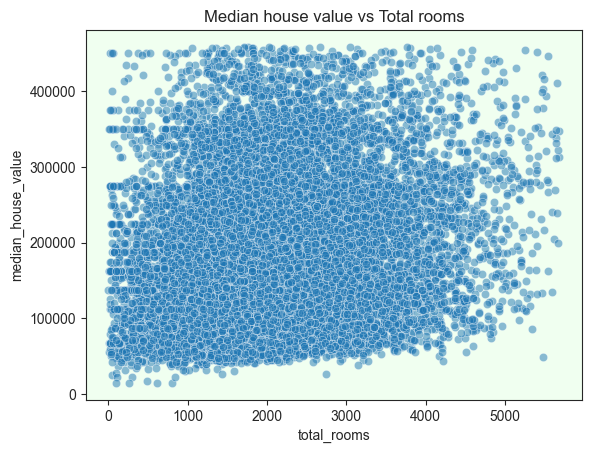

In [136]:
sns.scatterplot(data=cali_v4, x='total_rooms', y='median_house_value', alpha=0.5)
plt.title('Median house value vs Total rooms')
plt.show()

# <div style='padding:20px;color:white;margin:0;font-size:30px;font-family:Montserrat;text-align:left;display:fill;border-radius:5px;background-color:#a62534;overflow:hidden'>Model Development</div>

#### ***`Simple Linear Regression`***

In [158]:
# Pick out x and y values
X = cali_v4.loc[:, ['median_income']]
Y = cali_v4.loc[:, 'median_house_value']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [159]:
# Train the model
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression()

In [160]:
# Make predictions
y_pred = linear_model.predict(x_test)

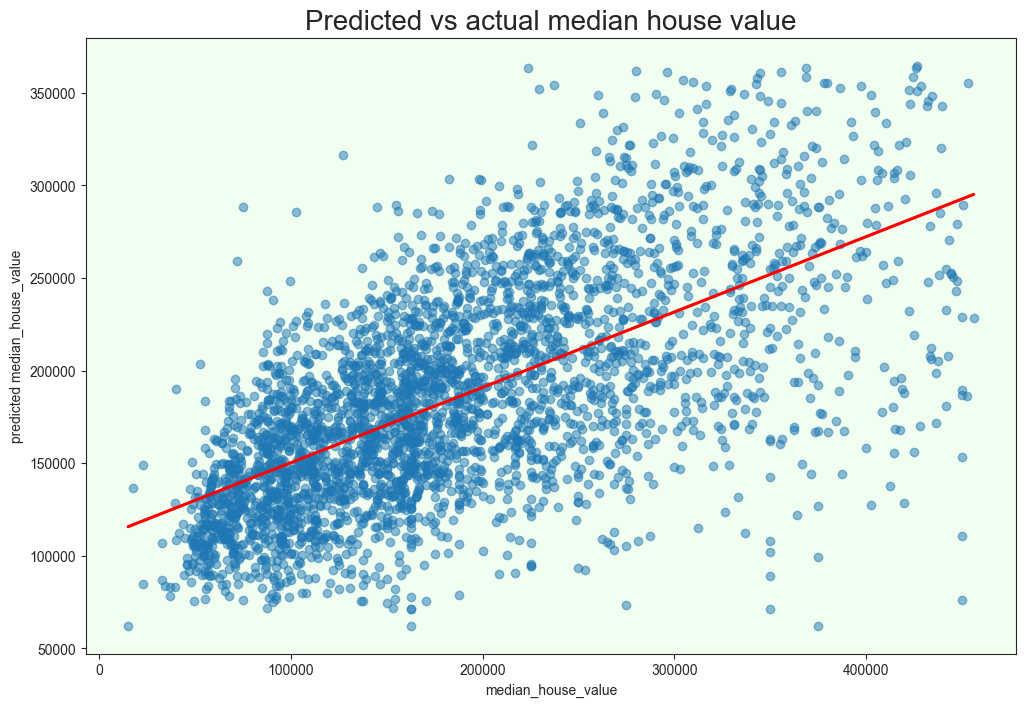

In [161]:
plt.figure(figsize=(12,8))
sns.regplot(x=y_test, y=y_pred, ci=None, scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
plt.title('Predicted vs actual median house value', fontsize=20)
plt.ylabel('predicted median_house_value')
plt.show()

#### ***`Simple Linear Regression (standardisation)`***

In [164]:
# Scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [165]:
# Train the model
model = LinearRegression()
model.fit(x_train_scaled, y_train)

LinearRegression()

In [166]:
# Make predictions
y_pred_scaled = model.predict(x_test_scaled)

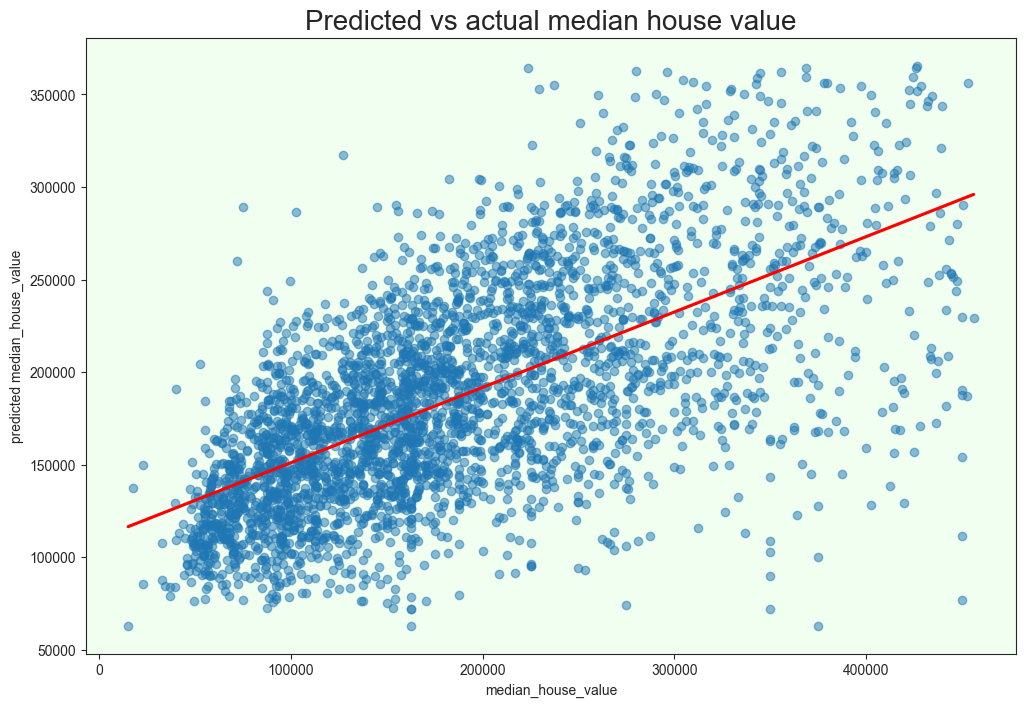

In [189]:
plt.figure(figsize=(12,8))
sns.regplot(x=y_test, y=y_pred_scaled, ci=None, scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
plt.title('Predicted vs actual median house value', fontsize=20)
plt.ylabel('predicted median_house_value')
plt.show()

#### ***`Multiple Linear Regression`***

In [168]:
# Pick out feature and target 
features = cali_v4.drop(columns='median_house_value')
target = cali_v4.median_house_value

# Split into training and test sets
mx_train, mx_test, my_train, my_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [169]:
# Scale Values
scaler_2 = StandardScaler()
mx_train_scaled = scaler_2.fit_transform(mx_train)
mx_test_scaled = scaler_2.fit_transform(mx_test)

In [170]:
# Initiate a model
multiple_model = LinearRegression()
multiple_model.fit(mx_train_scaled, my_train)

LinearRegression()

In [171]:
# Make predictions
pred = multiple_model.predict(mx_test_scaled)

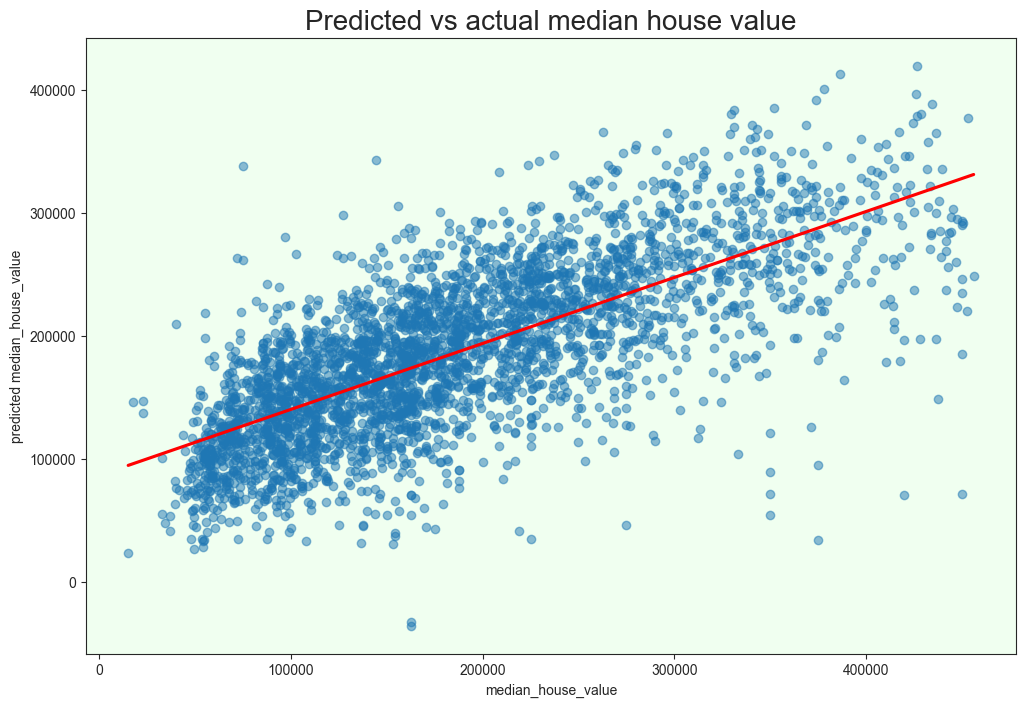

In [190]:
plt.figure(figsize=(12,8))
sns.regplot(x=y_test, y=pred, ci=None, scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
plt.title('Predicted vs actual median house value', fontsize=20)
plt.ylabel('predicted median_house_value')
plt.show()

#### ***`Multiple Linear Regression (Normalisation)`***

In [198]:
og_x = cali_v2.drop(columns=['longitude','latitude','median_house_value'])
og_y = cali_v2.median_house_value

og_xtrain, og_xtest, og_ytrain, og_ytest = train_test_split(og_x, og_y, test_size=0.2, random_state=123)

In [204]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
og_xtrain_scaled = sc.fit_transform(og_xtrain)
og_xtest_scaled = sc.fit_transform(og_xtest)

In [205]:
og_model = LinearRegression()
og_model.fit(og_xtrain_scaled, og_ytrain)

LinearRegression()

In [206]:
og_pred = og_model.predict(og_xtest_scaled)

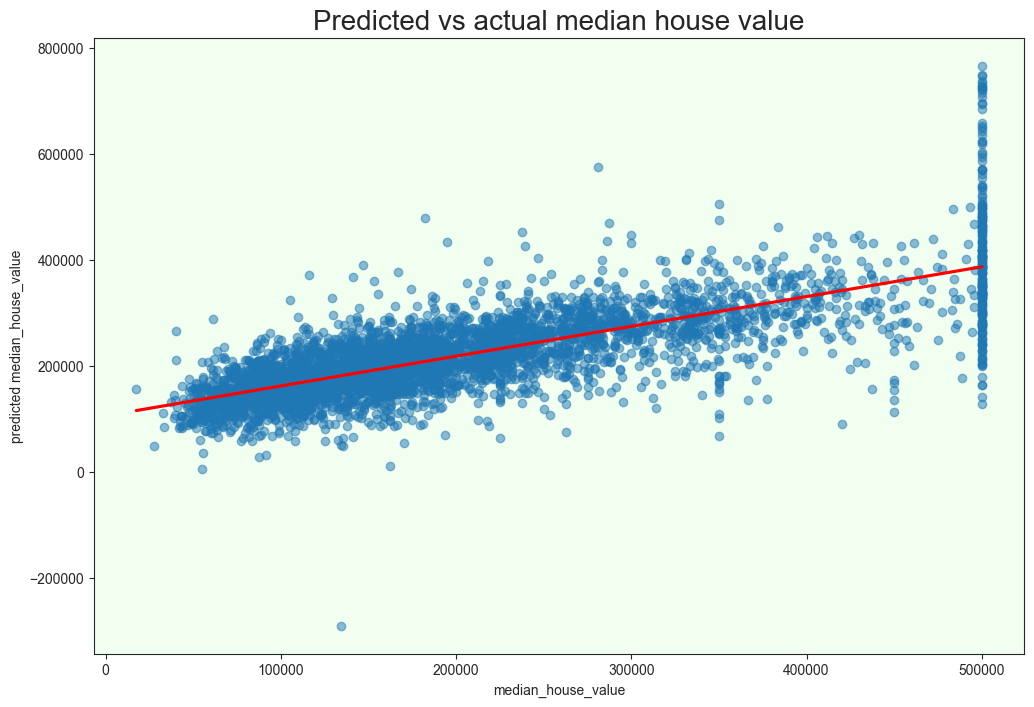

In [207]:
plt.figure(figsize=(12,8))
sns.regplot(x=og_ytest, y=og_pred, ci=None, scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
plt.title('Predicted vs actual median house value', fontsize=20)
plt.ylabel('predicted median_house_value')
plt.show()

# <div style='padding:20px;color:white;margin:0;font-size:30px;font-family:Montserrat;text-align:left;display:fill;border-radius:5px;background-color:#a62534;overflow:hidden'>Model Evaluation</div>

#### ***`Simple Linear Regression`***

In [208]:
# Output the model's coefficients
print(f'Coefficients: {linear_model.coef_}')
print('\n')
print(f'Intercept: {linear_model.intercept_}')

# Calculate the Mean Squared Error RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Mean Squared Error: {mse}')
print(f'RMSE : {rmse}')

# Calculate r2_score
r2 = r2_score(y_test, y_pred)
print(f'R2 score : {r2}')

Coefficients: [40468.82622068]


Intercept: 40607.71116018927
Mean Squared Error: 4989726508.082182
RMSE : 70637.99620658971
R2 score : 0.4057074026441466


#### ***`Simple Linear Regression (Standardisation)`***

In [209]:
# Output the model's coefficients
print(f'Coefficients: {model.coef_}')
print('\n')
print(f'Intercept: {model.intercept_}')

# Calculate the Mean Squared Error RMSE
mse = mean_squared_error(y_test, y_pred_scaled)
rmse = np.sqrt(mse)
print(f'Mean Squared Error: {mse}')
print(f'RMSE : {rmse}')

# Calculate r2_score
r2 = r2_score(y_test, y_pred_scaled)
print(f'R2 score : {r2}')

Coefficients: [58526.11780997]


Intercept: 185505.28980467597
Mean Squared Error: 4990409383.624615
RMSE : 70642.82966886742
R2 score : 0.40562606995404304


#### ***`Multiple Linear Regression`***

In [210]:
# Output the model's coefficients
print(f'Coefficients: {multiple_model.coef_}')
print('\n')
print(f'Intercept: {multiple_model.intercept_}')

# Calculate the Mean Squared Error RMSE
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print(f'Mean Squared Error: {mse}')
print(f'RMSE : {rmse}')

# Calculate r2_score
r2 = r2_score(y_test, pred)
print(f'R2 score : {r2}')

Coefficients: [ 18429.27035865 -45363.91355252  35977.84576275 -30846.3197298
  43792.74799097  75365.28009501   3568.04321426]


Intercept: 185505.28980467597
Mean Squared Error: 4001156400.086091
RMSE : 63254.69468811063
R2 score : 0.5234493061728754


#### ***`Multiple Linear Regression (Normalisation)`***

In [211]:
# Output the model's coefficients
print(f'Coefficients: {og_model.coef_}')
print('\n')
print(f'Intercept: {og_model.intercept_}')

# Calculate the Mean Squared Error RMSE
mse = mean_squared_error(og_ytest, og_pred)
rmse = np.sqrt(mse)
print(f'Mean Squared Error: {mse}')
print(f'RMSE : {rmse}')

# Calculate r2_score
r2 = r2_score(og_ytest, og_pred)
print(f'R2 score : {r2}')

Coefficients: [   90523.08663603  -717833.4111261    473072.1163443  -1046159.61845279
   901184.5568425    687081.44760095    16026.09662416]


Intercept: -19521.229321795632
Mean Squared Error: 6028326329.274118
RMSE : 77642.29729518646
R2 score : 0.5466790351992171


# <div style='padding:20px;color:white;margin:0;font-size:30px;font-family:Montserrat;text-align:left;display:fill;border-radius:5px;background-color:#a62534;overflow:hidden'>Model Interpretation</div>

####  ***`Simple Linear Regression`***
- **Coefficients**: [40468.82622068]
- **Intercept**: 40607.71116018927
- **Mean Squared Error (MSE)**: 4,989,726,508.082182
- **Root Mean Squared Error (RMSE)**: 70,637.99620658971
- **R² score**: 0.4057074026441466

**Interpretation**:
The simple linear regression model, which predicts the median house value based on a single feature (median_income), resulted in an R² score of approximately 0.406. This means that around 40.6% of the variance in the median house value can be explained by this model. The relatively high RMSE value indicates that the model's predictions are significantly deviating from the actual values.

####  ***`Simple Linear Regression with Standardisation`***
- **Coefficients**: [58526.11780997]
- **Intercept**: 185505.28980467597
- **Mean Squared Error (MSE)**: 4,990,409,383.624615
- **Root Mean Squared Error (RMSE)**: 70,642.82966886742
- **R² score**: 0.40562606995404304

**Interpretation**:
Standardizing the features before performing simple linear regression resulted in a very slight decrease in the R² score to approximately 0.406, and the RMSE increased marginally to approximately 70,643. The standardization did not significantly impact the overall performance of the model. These results suggest that standardizing the single feature used in simple linear regression does not significantly improve model performance

####  ***`Multiple Linear Regression`***
- **Coefficients**: [ 18429.27035865, -45363.91355252, 35977.84576275, -30846.3197298, 43792.74799097, 75365.28009501, 3568.04321426]
- **Intercept**: 185505.28980467597
- **Mean Squared Error (MSE)**: 4,001,156,400.086091
- **Root Mean Squared Error (RMSE)**: 63,254.69468811063
- **R² score**: 0.5234493061728754

**Interpretation**:
The multiple linear regression model, which includes multiple features to predict the median house value, showed a significant improvement over the simple linear regression model. The R² score increased to approximately 0.523, indicating that around 52.3% of the variance in the median house value can be explained by the model. The reduction in RMSE to approximately 63,255 shows that the predictions are closer to the actual values compared to the simple linear regression model.

#### ***`Multiple Linear Regression with Normalisation`***

- ***Coefficients***: [ 90523.08663603, -717833.4111261, 473072.1163443, -1046159.61845279, 901184.5568425, 687081.44760095, 16026.09662416]
- ***Intercept***: -19521.229321795632
- ***Mean Squared Error (MSE)***: 5,722,924,513.121057
- ***Root Mean Squared Error (RMSE)***: 75,650.01330549161
- ***R² score***: 0.5696447869499336

**Interpretation**:
The multiple linear regression model with normalised features resulted in the highest R² score of approximately 0.570, indicating that around 57% of the variance in the median house value can be explained by this model. However, the RMSE increased to approximately 75,650, which is higher than the RMSE of the multiple linear regression without normalisation. This suggests that normalisation improved the model's explanatory power (R² score) but also increased the average error of the predictions.

#### ***`Summary`***

- The simple linear regression model provided a baseline with an R² score of around 0.406, indicating moderate explanatory power.
- Standardizing the data in simple linear regression resulted in negligible changes to performance metrics, with the R² score remaining around 0.406 and RMSE around 70,643.
- The multiple linear regression model without normalisation showed a marked improvement in performance, with an R² score of 0.523 and an RMSE of 63,255.
- The multiple linear regression model with normalisation provided the highest R² score of 0.570, indicating better explanatory power, but at the cost of a higher RMSE (75,650), suggesting increased average prediction error.

In conclusion, while the simple linear regression models give a basic understanding, multiple linear regression models provide more robust and accurate predictions by leveraging additional features. The choice between using normalised features or not depends on whether the priority is a higher explanatory power (R²) or lower average prediction error (RMSE). Normalisation may be beneficial for improving the model's ability to explain variance but could lead to higher prediction errors.